In [51]:
import pandas as pd
nc = pd.read_csv('nightlife_crime.csv',encoding='cp949')
nc_data=pd.concat([nc['murder'],nc['robbery'],nc['forcible_rape'],nc['thef'],nc['violence']], axis=1)

nc_data

,murder,robbery,forcible_rape,thef,violence
0,0,6,19,140,176
1,0,3,6,193,158
2,0,0,9,166,210
3,0,3,9,273,240
4,0,2,14,170,209
5,0,0,29,155,153
6,0,1,3,157,194
7,0,0,7,146,66
8,0,6,14,227,337
9,0,6,21,126,107


<AxesSubplot:>

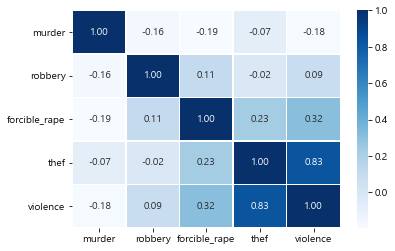

In [52]:
import seaborn as sns
sns.heatmap(data = nc_data.corr(), annot=True,  fmt = '.2f', linewidths=.5, cmap='Blues')

### heatmap 통해 상관관계 있어보이는 thef와 violence를 KMeans

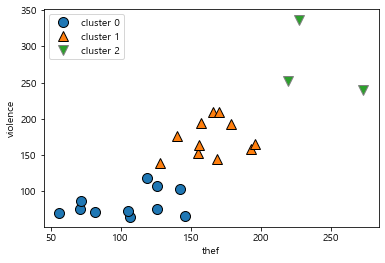

In [95]:
import mglearn
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X=nc_data

kmeans=KMeans(n_clusters=3)
assignment=kmeans.fit_predict(X)

mglearn.discrete_scatter(X.iloc[:,3],X.iloc[:,4],assignment)
plt.legend(["cluster 0","cluster 1","cluster 2"],loc="best")
plt.xlabel("thef")
plt.ylabel("violence")
plt.show()

### 2차원으로 축소한후 시각화

In [91]:
from matplotlib import font_manager, rc
import matplotlib

#한글 폰트 등록
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

#####################################
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

scaler=StandardScaler()
scaler.fit(X)
X_Scaled=scaler.transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_Scaled)

X_pca=pca.transform(X_Scaled)
print(X_Scaled.shape)
print(X_pca.shape)

(25, 5)
(25, 2)


C:\Users\hrim1\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hrim1\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


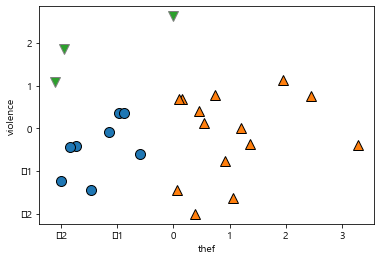

In [99]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans= KMeans(n_clusters=3)
kmeans.fit(X_Scaled) 
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],kmeans.labels_)

plt.xlabel("thef")
plt.ylabel("violence")
plt.show()